In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
from datasist.structdata import detect_outliers

In [2]:
raw_df=pd.read_csv('../data/processed/Analysis & Visualization.csv')
df=raw_df.copy()

In [3]:
df

,Unnamed: 0,patient_id,age,gender,visual_acuity_measurements,iop,cdr,family_history,medical_history,medication_usage,...,visual_symptoms,diagnosis,glaucoma_type,sensitivity,specificity,rnfl_thickness,gcc_thickness,retinal_volume,macular_thickness,no_medication_usage
0,0,62431,69,Male,0.1,Normal,Normal,No,Diabetes,"Amoxicillin, Lisinopril, Omeprazole, Atorvasta...",...,"Tunnel vision, Eye pain, Nausea",No Glaucoma,Primary Open-Angle Glaucoma,0.54,0.75,86.48,64.14,5.63,283.67,7
1,1,68125,69,Female,0.1,Normal,Case of glaucoma,No,Hypertension,"Lisinopril, Amoxicillin, Atorvastatin, Ibuprof...",...,"Redness in the eye, Vision loss, Tunnel vision",No Glaucoma,Juvenile Glaucoma,0.72,0.88,96.88,56.48,5.69,261.48,5
2,2,63329,67,Female,0.3,High,Case of glaucoma,No,Hypertension,"Amoxicillin, Ibuprofen, Metformin, Atorvastati...",...,"Halos around lights, Vision loss, Redness in t...",No Glaucoma,Juvenile Glaucoma,0.56,0.80,89.81,59.05,5.96,282.34,6
3,3,47174,23,Male,0.0,Normal,Case of glaucoma,No,other,"Ibuprofen, Aspirin",...,"Nausea, Nausea, Halos around lights",No Glaucoma,Congenital Glaucoma,0.60,0.93,87.25,63.98,6.44,262.86,2
4,4,67361,21,Male,0.1,Normal,Normal,No,Diabetes,"Amoxicillin, Omeprazole, Aspirin, Ibuprofen, A...",...,"Eye pain, Eye pain, Tunnel vision",No Glaucoma,Primary Open-Angle Glaucoma,0.82,0.90,82.61,66.01,6.16,261.78,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,61720,81,Female,0.1,High,Normal,No,other,Amoxicillin,...,"Eye pain, Eye pain, Tunnel vision",Glaucoma,Normal-Tension Glaucoma,0.81,0.97,83.41,66.55,5.92,275.25,1
9996,9996,34983,65,Male,0.0,Normal,Case of glaucoma,No,Diabetes,Lisinopril,...,"Eye pain, Halos around lights, Vomiting",No Glaucoma,Normal-Tension Glaucoma,0.70,0.97,83.04,63.24,6.13,268.39,1
9997,9997,67810,56,Female,0.3,Normal,Case of glaucoma,Yes,Diabetes,Ibuprofen,...,"Vision loss, Vomiting, Blurred vision",No Glaucoma,Secondary Glaucoma,0.80,0.90,95.93,59.78,5.85,280.84,1
9998,9998,34285,26,Male,0.1,High,Case of glaucoma,No,Glaucoma in family,Amoxicillin,...,"Halos around lights, Nausea, Nausea",Glaucoma,Normal-Tension Glaucoma,0.68,0.90,92.84,69.35,5.54,270.12,1


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,patient_id,age,gender,visual_acuity_measurements,iop,cdr,family_history,medical_history,medication_usage,pachymetry,...,visual_symptoms,diagnosis,glaucoma_type,sensitivity,specificity,rnfl_thickness,gcc_thickness,retinal_volume,macular_thickness,no_medication_usage
0,62431,69,Male,0.1,Normal,Normal,No,Diabetes,"Amoxicillin, Lisinopril, Omeprazole, Atorvasta...",Normal,...,"Tunnel vision, Eye pain, Nausea",No Glaucoma,Primary Open-Angle Glaucoma,0.54,0.75,86.48,64.14,5.63,283.67,7
1,68125,69,Female,0.1,Normal,Case of glaucoma,No,Hypertension,"Lisinopril, Amoxicillin, Atorvastatin, Ibuprof...",Thick,...,"Redness in the eye, Vision loss, Tunnel vision",No Glaucoma,Juvenile Glaucoma,0.72,0.88,96.88,56.48,5.69,261.48,5
2,63329,67,Female,0.3,High,Case of glaucoma,No,Hypertension,"Amoxicillin, Ibuprofen, Metformin, Atorvastati...",Thick,...,"Halos around lights, Vision loss, Redness in t...",No Glaucoma,Juvenile Glaucoma,0.56,0.80,89.81,59.05,5.96,282.34,6
3,47174,23,Male,0.0,Normal,Case of glaucoma,No,other,"Ibuprofen, Aspirin",Thick,...,"Nausea, Nausea, Halos around lights",No Glaucoma,Congenital Glaucoma,0.60,0.93,87.25,63.98,6.44,262.86,2
4,67361,21,Male,0.1,Normal,Normal,No,Diabetes,"Amoxicillin, Omeprazole, Aspirin, Ibuprofen, A...",Thick,...,"Eye pain, Eye pain, Tunnel vision",No Glaucoma,Primary Open-Angle Glaucoma,0.82,0.90,82.61,66.01,6.16,261.78,5


In [6]:
df.isnull().sum()

patient_id                    0
age                           0
gender                        0
visual_acuity_measurements    0
iop                           0
cdr                           0
family_history                0
medical_history               0
medication_usage              0
pachymetry                    0
cataract_status               0
angle_closure_status          0
visual_symptoms               0
diagnosis                     0
glaucoma_type                 0
sensitivity                   0
specificity                   0
rnfl_thickness                0
gcc_thickness                 0
retinal_volume                0
macular_thickness             0
no_medication_usage           0
dtype: int64

In [7]:
num_col=df.select_dtypes(include='number')
num_col=num_col.columns
num_col

Index(['patient_id', 'age', 'visual_acuity_measurements', 'sensitivity',
       'specificity', 'rnfl_thickness', 'gcc_thickness', 'retinal_volume',
       'macular_thickness', 'no_medication_usage'],
      dtype='object')

C:\Users\mnso\AppData\Local\Temp\ipykernel_3620\3470992412.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  figure=axes[i].set_xticklabels([col])
C:\Users\mnso\AppData\Local\Temp\ipykernel_3620\3470992412.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  figure=axes[i].set_xticklabels([col])
C:\Users\mnso\AppData\Local\Temp\ipykernel_3620\3470992412.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  figure=axes[i].set_xticklabels([col])
C:\Users\mnso\AppData\Local\Temp\ipykernel_3620\3470992412.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  figure=axes[i].set_xticklabels([col])
C:\Users\mnso\AppData\Local\Temp\ipykernel_3620\3470992412.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  figure=axes[i].set_xticklabels([col])
C:\Users\mnso\AppData\Local\Temp\ipykernel_3620\3470992412.py:4: UserWarning: FixedFormatter should 

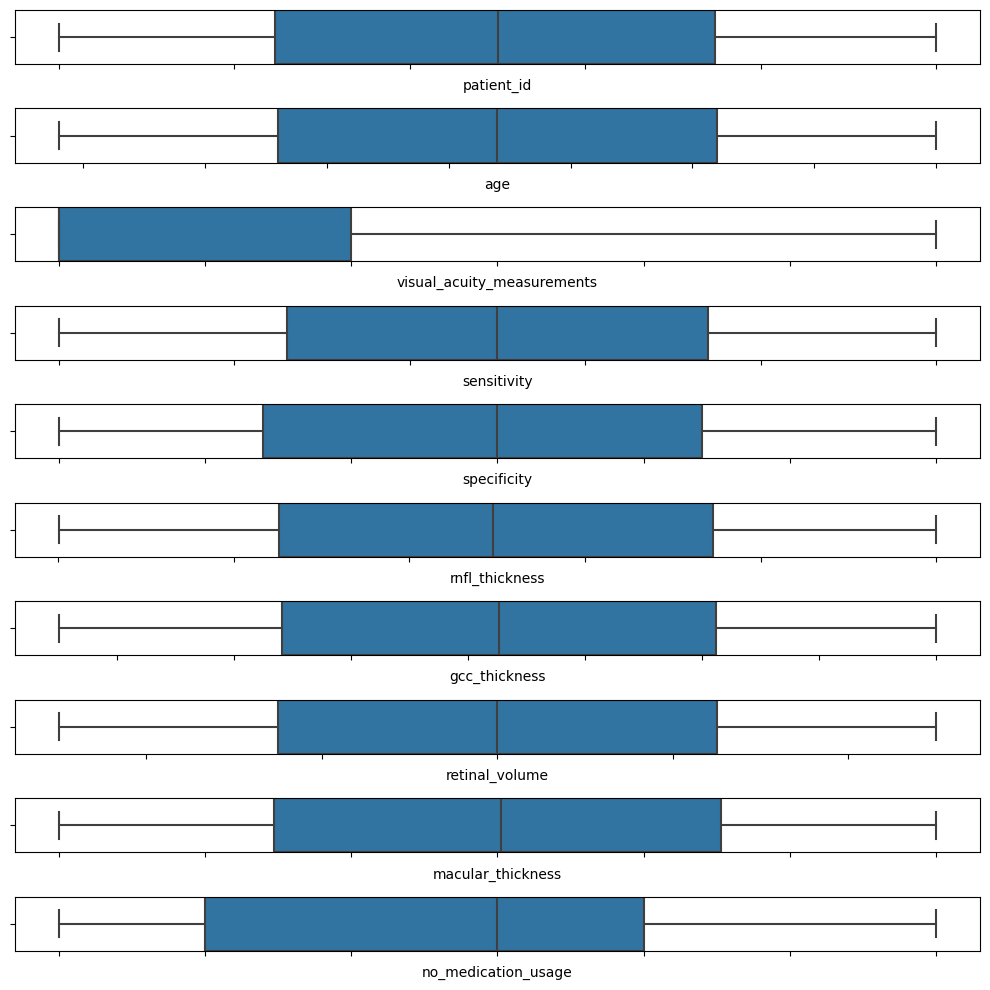

In [8]:
fig, axes = plt.subplots(10, 1, figsize=(10, 10))
for i, col in enumerate(num_col):
    figure=sns.boxplot(data=df, x=col, width=1, fliersize=8, whis=4, ax=axes[i])
    figure=axes[i].set_xticklabels([col])
    
plt.tight_layout()
plt.show()

In [9]:
len(detect_outliers(df,0,num_col))

2442

In [10]:
for col in num_col:
    out_ids=detect_outliers(df,0,[col])
    df[col].iloc[out_ids]=df[col].median()

In [12]:
len(detect_outliers(df,0,num_col))

0

In [13]:
df.to_csv('../data/processed/PreProcessing.csv')